# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('C:/cms_hospital_readmissions.csv')


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')


c:\users\vsingh\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


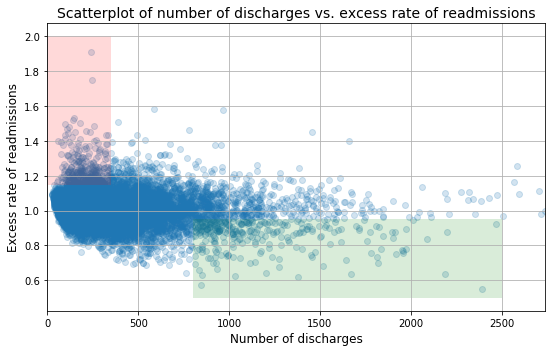

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

Here are my opinions on each part of the above analysis and recommendations. 

**A. Initial observations based on the plot above** 
+ This plot is very poorly constructed and its very hard to discern a lot of information from it. There is certainly some hidden information that isn't apparent due to massive clusters of unknown quantities. Just by eyeballing the plot, it does look like readmissions is perhaps slightly trending down but more analysis and better plots certainly need to be conducted. 
+ When the analysis says "With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)", this is completely excluding the region on the y-axis from 1.0 - approximately 1.15. Excess readmissions are indicated if the ratio is greater than one, but the area in red does not fully include this region, and it is impossible to discern the general ratio of hospitals that even fall in that range due to how cluttered the chart is. 
+ When the analysis says "With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)", this area also doesn't include the entire region where excess rate of readmissions < 1. 
+ Graphs that cover the entire relevant area for observation are needed, and a scatterplot does not appear to be the ideal visualization tool for this analysis. 

**B. Statistics**
+ The analysis does not account for hospitals where the number of discharges is between 100 and 1000, which is excluding a majority of the data. This data might not neccesarily need to be considered when comparing differences between the highest and lowest amounts of discharges, but is worth noting. Also the observed differences between hospitals/facilities with less than 100 and more than 1000 discharges doesn't seem significant, and is potentially incorrect considering all data in the appropriate ratios might not be being considered.

**C. Conclusions**
+ From what I've observed from the scatterplot, I don't think this conclusion can be made without a more accurate test being performed. 
+ I will provide my own conclusions following execution of my own test. 

**D. Regulatory policy recommendations**
+ The mark of "300" used in the analysis doesn't correspond to a point that stands out on the graph in any way, and almost seems to be a random number. A more appropriate set of recommendations will be provided following execution of my own hypothesis test. 

### Question 1

Here are the parameters for my hypothesis test.

Null Hypothesis: There is no significant difference between the Excess Readmission Ratio between hospitals with less than 100 discharges and more than 1000 discharges. 

Alternative Hypothesis: There is a significant difference between the Excess Readmission Ratio between hospitals with less than 100 discharges and more than 1000 discharges. 


In [6]:
#Seperate the data
a = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >= 1000]
b = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <= 100]


In [7]:
#Calculating Relevant Variables
a_mean = a['Excess Readmission Ratio'].mean()
b_mean = b['Excess Readmission Ratio'].mean()
a_std = a['Excess Readmission Ratio'].std()
b_std = b['Excess Readmission Ratio'].std()
a_mean, b_mean, a_std, b_std

(0.9783342672413794,
 1.0220883892068684,
 0.11987768843246499,
 0.05815445709323675)

In [8]:
diffmean = b_mean - a_mean
margin = np.sqrt((a_std**2)/len(a) + (b_std**2)/len(b))
diffmean, margin

(0.043754121965489, 0.00579351045058168)

In [9]:
#Question 2
z = (diffmean - 0)/margin
print("The p value in this test is: ", (1 - stats.norm.cdf(z)))

The p value in this test is:  2.142730437526552e-14


### Question 3
For this test, the p value is < 0.01 and therefore we can reject the null hypothesis and say there is a statistically significant difference in readmission ratio between the two groups. 

### Question 4
Although there is a statistically significant difference, there is not muc practical significance to these numbers, because there is no indication of where the regions that the biggest changes are occuring are in and how much they differ in readmission ratio, so there isn't much action that can be taken from the numbers that indicate statistical significance. 

### Question 5
As stated earlier, this plot is very confusing and hard to discern much information from. There are so many clusters of unknown quantity and the red and green shaded regions leave a lot to be desired. A better representation is shown below. This gives a relative idea of the distrubition of the data along with a visual representation of the regression line. 

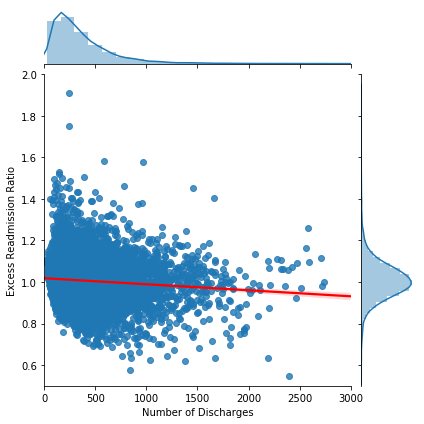

In [17]:
import seaborn as sns
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=clean_hospital_read_df, kind='reg', 
              xlim=(0,3000), ylim=(0.5,2.0), joint_kws={'line_kws':{'color':'red'}})